In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load in the churn dataset
# assign them to variables df_1, df_2 respectively

df_1 = pd.read_csv("churn-bigml-20.csv")
df_2 = pd.read_csv("churn-bigml-80.csv")

In [3]:
df_1.head() #prints the first 5 lines of df_1

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [4]:
df_2.head(5) #prints the first 5 lines of df_1

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

from sklearn.metrics import confusion_matrix

In [5]:
print(df_1.shape)
print(df_2.shape)

(667, 20)
(2666, 20)


In [6]:
df_1.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [7]:
df_2.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [8]:
df_3 = pd.concat([df_1, df_2], ignore_index=True)
df_3

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3329,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [9]:
df_3.shape

(3333, 20)

In [10]:
columns_name = df_3.columns

new_names = []
for i in columns_name:
    new = str(i).lower().replace(" ", "-")
    new_names.append(new)

df_3.columns = new_names
df_3

,state,account-length,area-code,international-plan,voice-mail-plan,number-vmail-messages,total-day-minutes,total-day-calls,total-day-charge,total-eve-minutes,total-eve-calls,total-eve-charge,total-night-minutes,total-night-calls,total-night-charge,total-intl-minutes,total-intl-calls,total-intl-charge,customer-service-calls,churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3329,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


# EDA: Decription Statistic

In [11]:
print(df_3.dtypes)
df_3.dtypes.value_counts()

state                      object
account-length              int64
area-code                   int64
international-plan         object
voice-mail-plan            object
number-vmail-messages       int64
total-day-minutes         float64
total-day-calls             int64
total-day-charge          float64
total-eve-minutes         float64
total-eve-calls             int64
total-eve-charge          float64
total-night-minutes       float64
total-night-calls           int64
total-night-charge        float64
total-intl-minutes        float64
total-intl-calls            int64
total-intl-charge         float64
customer-service-calls      int64
churn                        bool
dtype: object


int64      8
float64    8
object     3
bool       1
Name: count, dtype: int64

In [12]:
df_3.describe() 

,account-length,area-code,number-vmail-messages,total-day-minutes,total-day-calls,total-day-charge,total-eve-minutes,total-eve-calls,total-eve-charge,total-night-minutes,total-night-calls,total-night-charge,total-intl-minutes,total-intl-calls,total-intl-charge,customer-service-calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
print(df_3.isna().sum())
print('duplicate values in df_3' ,df_3.duplicated().sum() )

state                     0
account-length            0
area-code                 0
international-plan        0
voice-mail-plan           0
number-vmail-messages     0
total-day-minutes         0
total-day-calls           0
total-day-charge          0
total-eve-minutes         0
total-eve-calls           0
total-eve-charge          0
total-night-minutes       0
total-night-calls         0
total-night-charge        0
total-intl-minutes        0
total-intl-calls          0
total-intl-charge         0
customer-service-calls    0
churn                     0
dtype: int64
duplicate values in df_3 0


In [14]:
Num_cols = ['account-length', 'number-vmail-messages', 'total-day-minutes',
       'total-day-calls', 'total-day-charge', 'total-eve-minutes',
       'total-eve-calls', 'total-eve-charge', 'total-night-minutes',
       'total-night-calls', 'total-night-charge', 'total-intl-minutes',
       'total-intl-calls', 'total-intl-charge', 'customer-service-calls'
       ]

df_num = df_3[Num_cols]

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

account-length            True
number-vmail-messages     True
total-day-minutes         True
total-day-calls           True
total-day-charge          True
total-eve-minutes         True
total-eve-calls           True
total-eve-charge          True
total-night-minutes       True
total-night-calls         True
total-night-charge        True
total-intl-minutes        True
total-intl-calls          True
total-intl-charge         True
customer-service-calls    True
dtype: bool

In [17]:
for col in Num_cols:
    df_3 = df_3[df_3[col].between(Q1[col] - 1.5 * IQR[col], Q3[col] + 1.5 * IQR[col])]

In [18]:
df_num = df_3[Num_cols]

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

account-length            False
number-vmail-messages     False
total-day-minutes         False
total-day-calls           False
total-day-charge          False
total-eve-minutes         False
total-eve-calls           False
total-eve-charge          False
total-night-minutes       False
total-night-calls         False
total-night-charge        False
total-intl-minutes        False
total-intl-calls          False
total-intl-charge         False
customer-service-calls    False
dtype: bool

In [19]:
a = round(df_3['churn'].value_counts()/len(df_3['churn']),2)
churn_ratio =  pd.DataFrame(a).T 
churn_ratio

churn,False,True
count,0.89,0.11


In [20]:
df_3.describe(include=['object', 'boolean'])

,state,international-plan,voice-mail-plan,churn
count,2789,2789,2789,2789
unique,51,2,2,2
top,WV,No,No,False
freq,90,2522,2018,2486


In [21]:
df_3["area-code"].unique()

array([415, 510, 408], dtype=int64)

In [28]:
df_3["state"].unique()

array(['SC', 'HI', 'AK', 'MI', 'VA', 'MN', 'VT', 'LA', 'MT', 'ID', 'MA',
       'KY', 'CO', 'AZ', 'CA', 'WA', 'NE', 'OH', 'MO', 'AL', 'NH', 'NM',
       'OR', 'IN', 'MS', 'KS', 'NC', 'SD', 'OK', 'CT', 'DE', 'TX', 'UT',
       'NV', 'DC', 'RI', 'IL', 'NJ', 'MD', 'WI', 'NY', 'WV', 'PA', 'WY',
       'FL', 'ME', 'ND', 'AR', 'TN', 'IA', 'GA'], dtype=object)

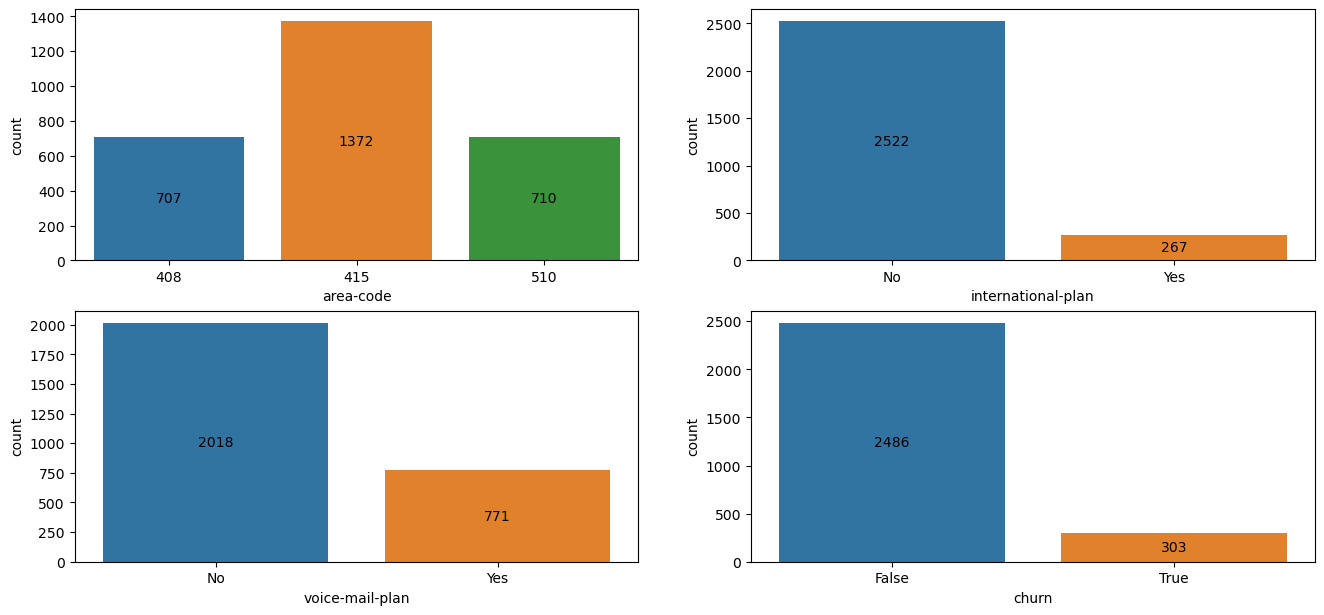

In [22]:
categorical_cols = ['area-code', 'international-plan','voice-mail-plan','churn']
# List the names of the categorical columns in a new list

fig = plt.figure(figsize=(16,15))
# Adjust the size figsize - where the visualized chart is displayed

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=df_3[col], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

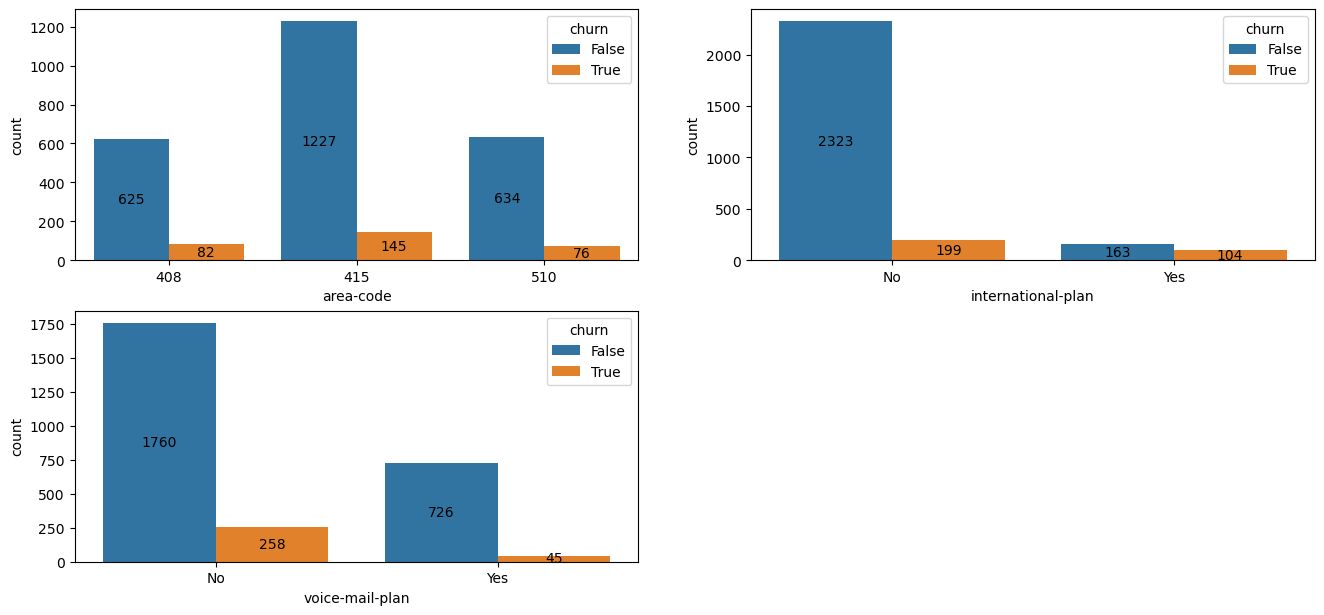

In [23]:
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=df_3[col], hue=df_3["churn"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

In [32]:
df = df_3.copy()

df['total-net-minutes'] = df['total-day-minutes'] + df['total-eve-minutes'] + df['total-night-minutes']
df['total-net-calls'] = df['total-day-calls'] + df['total-eve-calls'] + df['total-night-calls']
df['total-net-charge'] = df['total-day-charge'] + df['total-eve-charge'] + df['total-night-charge']


df['voice-mail-plan'] = df['voice-mail-plan'].map({'Yes': 1, 'No': 0}) 
df['international-plan'] = df['international-plan'].map({'Yes': 1, 'No': 0}) 
df['churn'] = df['churn'].apply(lambda x: 1 if x == True else 0) 


df.drop(columns= ['state'], inplace= True)
df.drop(columns=['total-day-charge', 'total-eve-charge','total-night-charge',
                'total-day-calls','total-eve-calls', 'total-night-calls', 'total-day-minutes', 
                 'total-eve-minutes', 'total-night-minutes'], inplace=True)

df["area-code"] = df["area-code"].astype(object)
df = pd.get_dummies(df, dtype = int, drop_first = True)

df.head(5)

,account-length,international-plan,voice-mail-plan,number-vmail-messages,total-intl-minutes,total-intl-calls,total-intl-charge,customer-service-calls,churn,total-net-minutes,total-net-calls,total-net-charge,area-code_415,area-code_510
3,111,0,0,0,7.7,6,2.08,2,0,437.3,310,38.97,1,0
4,49,0,0,0,11.1,1,3.00,1,0,513.1,316,46.60,0,1
5,36,0,1,30,14.5,6,3.92,0,0,438.1,317,44.50,0,0
6,65,0,0,0,13.2,5,3.56,3,0,508.6,360,55.80,1,0
8,10,0,0,0,11.4,6,3.08,2,0,659.1,235,60.54,0,0


In [31]:
df.shape

(2789, 14)

# Logistic Regression

In [47]:
X_lr = df.drop(['churn', 'total-net-calls', 'account-length', 'area-code_510', 'area-code_415', 'customer-service-calls'] , 
               axis = 1 )
y_lr = df['churn'] 


In [48]:
X_lr_train , X_lr_test , y_lr_train , y_lr_test = train_test_split(X_lr , y_lr  ,test_size = 0.20 , random_state = 420)

In [49]:
X_lr_train.shape , y_lr_train.shape , X_lr_test.shape , y_lr_test.shape 

((2231, 8), (2231,), (558, 8), (558,))

In [50]:
print("Y_train_No_Churn: ", sum(y_lr_train == 0))
print("Y_train_Yes_Churn: ", sum(y_lr_train == 1))
print("Y_test_No_Churn: ", sum(y_lr_test == 0))
print("Y_test_Yes_Churn: ", sum(y_lr_test == 1))

Y_train_No_Churn:  1994
Y_train_Yes_Churn:  237
Y_test_No_Churn:  492
Y_test_Yes_Churn:  66


In [51]:
scaler = MinMaxScaler()
X_lr_train_scaled = scaler.fit_transform(X_lr_train)
X_lr_test_scaled = scaler.transform(X_lr_test)

In [53]:
model_lr = LogisticRegression()  
model_lr.fit(X_lr_train_scaled, y_lr_train) 

LogisticRegression()

In [61]:
acc_lr = model_lr.score(X_lr_train_scaled, y_lr_train)

predictions_lr = model_lr.predict(X_lr_train_scaled)

tp_lr = sum((predictions_lr == 1) & (y_lr_train == 1))
fp_lr = sum((predictions_lr == 1) & (y_lr_train == 0))
tn_lr = sum((predictions_lr == 0) & (y_lr_train == 0))
fn_lr = sum((predictions_lr == 0) & (y_lr_train == 1))
sens_lr = tp_lr / (tp_lr + fn_lr)
spec_lr = tn_lr / (tn_lr + fp_lr)

print("Training Accuracy: ", round(acc_lr, 3))
print("Training Sensitivity: ", round(sens_lr, 3))
print("Training Specificity: ", round(spec_lr, 3))

Training Accuracy:  0.905
Training Sensitivity:  0.228
Training Specificity:  0.985


# RandomForest 

In [62]:
X_rf = df.drop('churn' , axis = 1 )
y_rf = df['churn'] 

In [63]:
X_rf_train , X_rf_test , y_rf_train , y_rf_test = train_test_split(X_rf , y_rf  ,test_size = 0.20 , random_state = 420)

In [64]:
X_rf_train.shape , y_rf_train.shape , X_rf_test.shape , y_rf_test.shape 

((2231, 13), (2231,), (558, 13), (558,))

In [65]:
print("Y_train_No_Churn: ", sum(y_rf_train == 0))
print("Y_train_Yes_Churn: ", sum(y_rf_train == 1))
print("Y_test_No_Churn: ", sum(y_rf_test == 0))
print("Y_test_Yes_Churn: ", sum(y_rf_test == 1))

Y_train_No_Churn:  1994
Y_train_Yes_Churn:  237
Y_test_No_Churn:  492
Y_test_Yes_Churn:  66


In [67]:
model_rf = RandomForestClassifier()
model_rf.fit(X_rf_train, y_rf_train)

RandomForestClassifier()

In [69]:
acc_rf = model_rf.score(X_rf_train, y_rf_train)

predictions_rf = model_rf.predict(X_rf_train)

tp_rf= sum((predictions_rf == 1) & (y_rf_train == 1))
fp_rf = sum((predictions_rf == 1) & (y_rf_train == 0))
tn_rf = sum((predictions_rf == 0) & (y_rf_train == 0))
fn_rf = sum((predictions_rf == 0) & (y_rf_train == 1))
sens_rf = tp_rf / (tp_rf + fn_rf)
spec_rf = tn_rf / (tn_rf + fp_rf)

print("Training Accuracy: ", round(acc_rf, 3))
print("Training Sensitivity: ", round(sens_rf, 3))
print("Training Specificity: ", round(spec_rf, 3))

Training Accuracy:  1.0
Training Sensitivity:  1.0
Training Specificity:  1.0


# EVALUATE THE MODEL

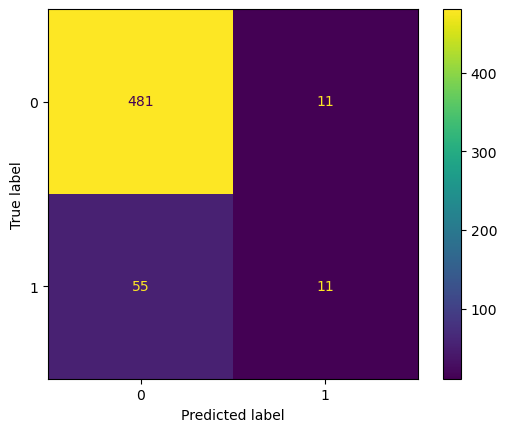

In [82]:
from sklearn.metrics import confusion_matrix

y_pred_test_lr = model_lr.predict(X_lr_test_scaled)

confusion_matrix = confusion_matrix(y_lr_test, y_pred_test_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

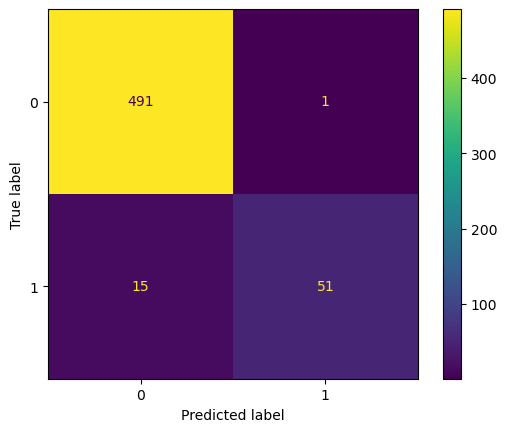

In [84]:
y_pred_test_rf = model_rf.predict(X_rf_test)

confusion_matrix = confusion_matrix(y_rf_test, y_pred_test_rf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [95]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score

def Model_features(X_test , y_test , y_pred , model_name):
    accuracy  =   round(accuracy_score(y_test , y_pred) , 3) , 
    precision  = round(precision_score(y_test, y_pred, average="micro")  ,3), 
    recall = round(recall_score(y_test , y_pred) ,3), 
    f1_s = round(f1_score(y_test , y_pred) , 3) , 
    c_val_score = round(cross_val_score(model_name, X , y , cv=10 , scoring='accuracy').mean()  , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'f1  Score is :{f1_s}')
    print(f'cross val score is :{c_val_score}')

In [96]:
Model_features(X_lr_test_scaled, y_lr_test, y_pred_test_lr, model_lr)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

Accuracy Score is :(0.882,)
Precision Score is :(0.882,)
Recall Score is :(0.167,)
f1  Score is :(0.25,)
cross val score is :0.897


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
Model_features(X_rf_test, y_rf_test, y_pred_test_rf, model_rf)

Accuracy Score is :(0.971,)
Precision Score is :(0.971,)
Recall Score is :(0.773,)
f1  Score is :(0.864,)
cross val score is :0.973
